## K-평균

In [34]:
#[220506_1345]CREATED 교수님이 주신 논문의 클러스터링 기법 응용을 위한 사전 공부; 가장 널리 쓰이는 k-평균 공부 시작
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [35]:
iris = load_iris()
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#[220506_1348]NOTED 붓꼿 데이터 세트를 3개 그룹으로 군집화
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
#[220506_1353]NOTED 데이터를 k-평균을 적용하기 적합한 객체로 변환
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
#[220506_1404]NOTED (target, labels) = (0, 1), (1, 2), (2, 3)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [6]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
#[220506_1405]NOTED 종류 0은 그룹 1로, 종류 1은 그룹 0으로, 종류 2는 그룹 2로 분류되어지는 것 같음
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head()

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### ML이 예측한 그룹

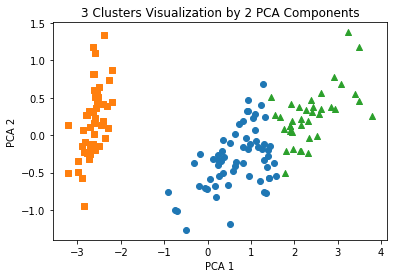

In [13]:
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind, 'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 실제 그룹

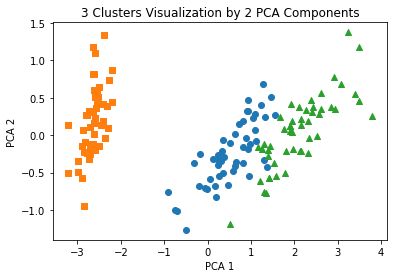

In [14]:
marker0_ind = irisDF[irisDF['target'] == 1].index
marker1_ind = irisDF[irisDF['target'] == 0].index
marker2_ind = irisDF[irisDF['target'] == 2].index

plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind, 'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
#[220506_1443]NOTED 실제와 에측이 거의 차이가 없다는 것을 알 수 있음
plt.show()

### 예제(무작위 데이터)생성기로 테스트

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [23]:
import pandas as pd
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


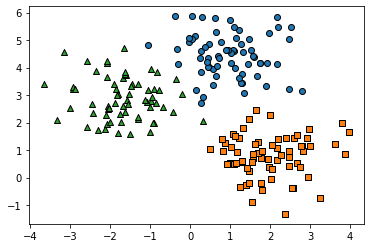

In [26]:
target_list = np.unique(y)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolors = 'k', marker = markers[target])
plt.show()

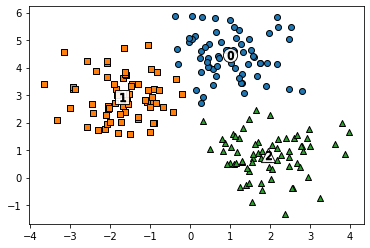

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
#[220506_1542]NOTED fit() == fit_predict(). fit_predict()는 label값을 바로 반환. cf) 새로운 데이터셋을 클러스터링 하기 위해선 predict() 필요
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

#[220506_1526]NOTED cluster_centers_: 중심 위치 반환
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolors = 'k', marker = markers[label])

    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolors = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolors = 'k', marker = '$%d$' % label)

plt.show()
    

In [28]:
#[220506_1535]NOTED 정확히 분류됨
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


### 성능 평가 지표(실루엣 분석)

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#[220506_1611]NOTED 모든 데이터의 실루엣 계수
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

irisDF['silhouette_coeff'] = score_samples
#[220506_1611]NOTED 모든 데이터의 실루엣 계수의 평균
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
#[220506_1626]NOTED 1번 그룹의 실루엣 계수 > 전체 평균 실루엣 계수 -> 편차가 높아 좋은 클러스터링은 아님을 알 수 있음
irisDF.head()

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [3]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

## DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
print(iris.data)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.

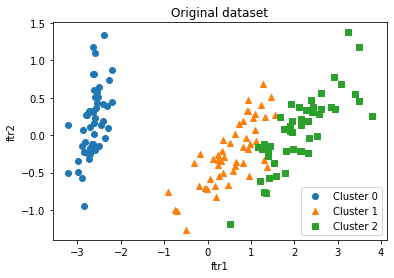

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

#[220623_1915]NOTED 기존 군집의 개수는 3개
marker0_indx = irisDF[irisDF['target'] == 0].index
marker1_indx = irisDF[irisDF['target'] == 1].index
marker2_indx = irisDF[irisDF['target'] == 2].index

plt.scatter(x = irisDF.loc[marker0_indx, 'ftr1'], y = irisDF.loc[marker0_indx, 'ftr2'], marker = 'o', label = 'Cluster 0')
plt.scatter(x = irisDF.loc[marker1_indx, 'ftr1'], y = irisDF.loc[marker1_indx, 'ftr2'], marker = '^', label = 'Cluster 1')
plt.scatter(x = irisDF.loc[marker2_indx, 'ftr1'], y = irisDF.loc[marker2_indx, 'ftr2'], marker = 's', label = 'Cluster 2')

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.legend()
plt.title('Original dataset')
plt.show()

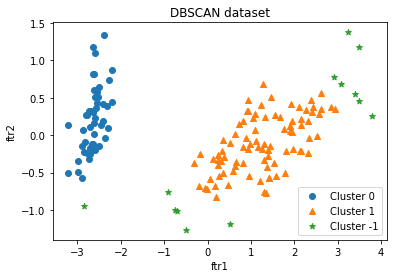

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

#[220623_1918]NOTED DBSCAN의 관점에서는 2개의 군집으로 분류(가장 적절한 분류 수라고 판단했기 때문) + 노이즈(-1)
marker0_indx = irisDF[irisDF['dbscan_cluster'] == 0].index
marker1_indx = irisDF[irisDF['dbscan_cluster'] == 1].index
marker_1_indx = irisDF[irisDF['dbscan_cluster'] == -1].index

plt.scatter(x = irisDF.loc[marker0_indx, 'ftr1'], y = irisDF.loc[marker0_indx, 'ftr2'], marker = 'o', label = 'Cluster 0')
plt.scatter(x = irisDF.loc[marker1_indx, 'ftr1'], y = irisDF.loc[marker1_indx, 'ftr2'], marker = '^', label = 'Cluster 1')
plt.scatter(x = irisDF.loc[marker_1_indx, 'ftr1'], y = irisDF.loc[marker_1_indx, 'ftr2'], marker = '*', label = 'Cluster -1')

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.legend()
plt.title('DBSCAN dataset')
plt.show()

* eps 0.6 -> 0.8

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


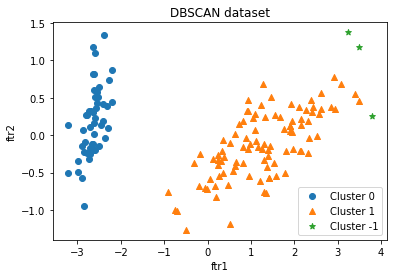

In [20]:
dbscan = DBSCAN(eps = 0.8, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

#[220623_1918]NOTED DBSCAN의 관점에서는 2개의 군집으로 분류(가장 적절한 분류 수라고 판단했기 때문) + 노이즈(-1)
marker0_indx = irisDF[irisDF['dbscan_cluster'] == 0].index
marker1_indx = irisDF[irisDF['dbscan_cluster'] == 1].index
marker_1_indx = irisDF[irisDF['dbscan_cluster'] == -1].index

plt.scatter(x = irisDF.loc[marker0_indx, 'ftr1'], y = irisDF.loc[marker0_indx, 'ftr2'], marker = 'o', label = 'Cluster 0')
plt.scatter(x = irisDF.loc[marker1_indx, 'ftr1'], y = irisDF.loc[marker1_indx, 'ftr2'], marker = '^', label = 'Cluster 1')
plt.scatter(x = irisDF.loc[marker_1_indx, 'ftr1'], y = irisDF.loc[marker_1_indx, 'ftr2'], marker = '*', label = 'Cluster -1')

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.legend()
plt.title('DBSCAN dataset')
#[220623_1944]NOTED 노이즈가 줄어듦을 확인 가능
plt.show()

* min_samples 8 -> 16

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


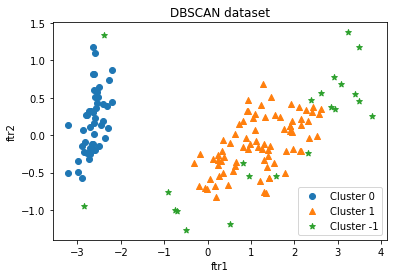

In [24]:
dbscan = DBSCAN(eps = 0.6, min_samples = 16, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

#[220623_1918]NOTED DBSCAN의 관점에서는 2개의 군집으로 분류(가장 적절한 분류 수라고 판단했기 때문) + 노이즈(-1)
marker0_indx = irisDF[irisDF['dbscan_cluster'] == 0].index
marker1_indx = irisDF[irisDF['dbscan_cluster'] == 1].index
marker_1_indx = irisDF[irisDF['dbscan_cluster'] == -1].index

plt.scatter(x = irisDF.loc[marker0_indx, 'ftr1'], y = irisDF.loc[marker0_indx, 'ftr2'], marker = 'o', label = 'Cluster 0')
plt.scatter(x = irisDF.loc[marker1_indx, 'ftr1'], y = irisDF.loc[marker1_indx, 'ftr2'], marker = '^', label = 'Cluster 1')
plt.scatter(x = irisDF.loc[marker_1_indx, 'ftr1'], y = irisDF.loc[marker_1_indx, 'ftr2'], marker = '*', label = 'Cluster -1')

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.legend()
plt.title('DBSCAN dataset')
#[220623_1944]NOTED 노이즈가 늘었음을 확인 가능
plt.show()

### 예제

In [25]:

### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

* 원본

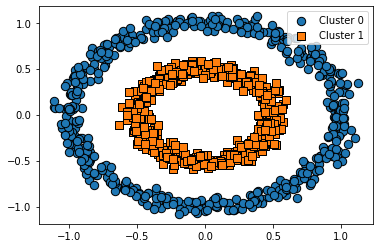

In [27]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

""" from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(X)
clusterDF['ftr1'] = pca_transformed[:, 0]
clusterDF['ftr2'] = pca_transformed[:, 1]

#[220623_1918]NOTED DBSCAN의 관점에서는 2개의 군집으로 분류(가장 적절한 분류 수라고 판단했기 때문) + 노이즈(-1)
marker0_indx = clusterDF[clusterDF['target'] == 0].index
marker1_indx = clusterDF[clusterDF['target'] == 1].index

plt.scatter(x = clusterDF.loc[marker0_indx, 'ftr1'], y = clusterDF.loc[marker0_indx, 'ftr2'], marker = 'o', label = 'Cluster 0')
plt.scatter(x = clusterDF.loc[marker1_indx, 'ftr1'], y = clusterDF.loc[marker1_indx, 'ftr2'], marker = '^', label = 'Cluster 1', c = 'r')

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.legend()
plt.title('Origin dataset')
plt.show() """

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

* K 평균

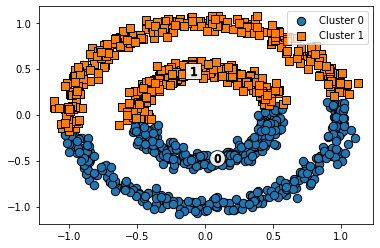

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

""" from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(X)
clusterDF['ftr1'] = pca_transformed[:, 0]
clusterDF['ftr2'] = pca_transformed[:, 1]

#[220623_1918]NOTED DBSCAN의 관점에서는 2개의 군집으로 분류(가장 적절한 분류 수라고 판단했기 때문) + 노이즈(-1)
marker0_indx = clusterDF[clusterDF['kmeans_cluster'] == 0].index
marker1_indx = clusterDF[clusterDF['kmeans_cluster'] == 1].index

plt.scatter(x = clusterDF.loc[marker0_indx, 'ftr1'], y = clusterDF.loc[marker0_indx, 'ftr2'], marker = 'o', label = 'Cluster 0')
plt.scatter(x = clusterDF.loc[marker1_indx, 'ftr1'], y = clusterDF.loc[marker1_indx, 'ftr2'], marker = '^', label = 'Cluster 1', c = 'r')

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.legend()
plt.title('KMenas dataset')
plt.show() """
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


* DBSCAN

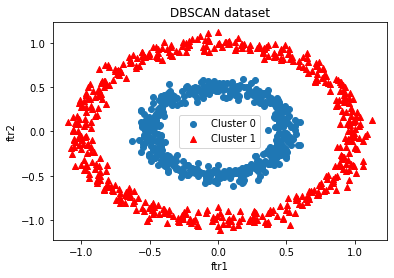

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(X)
clusterDF['ftr1'] = pca_transformed[:, 0]
clusterDF['ftr2'] = pca_transformed[:, 1]

#[220623_1918]NOTED DBSCAN의 관점에서는 2개의 군집으로 분류(가장 적절한 분류 수라고 판단했기 때문) + 노이즈(-1)
marker0_indx = clusterDF[clusterDF['dbscan_cluster'] == 0].index
marker1_indx = clusterDF[clusterDF['dbscan_cluster'] == 1].index

plt.scatter(x = clusterDF.loc[marker0_indx, 'ftr1'], y = clusterDF.loc[marker0_indx, 'ftr2'], marker = 'o', label = 'Cluster 0')
plt.scatter(x = clusterDF.loc[marker1_indx, 'ftr1'], y = clusterDF.loc[marker1_indx, 'ftr2'], marker = '^', label = 'Cluster 1', c = 'r')

""" marker0_indx = clusterDF[clusterDF['dbscan_cluster'] == 0]
marker1_indx = clusterDF[clusterDF['dbscan_cluster'] == 1]

plt.scatter(x = marker0_indx['ftr1'], y = marker0_indx['ftr2'], marker = 'o', label = 'Cluster 0')
plt.scatter(x = marker1_indx['ftr1'], y = marker1_indx['ftr2'], marker = '^', label = 'Cluster 1', c = 'r') """
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.legend()
plt.title('DBSCAN dataset')
plt.show()
#visualize_cluster_plot(None, clusterDF, 'dbscan_cluster', iscenter = False)

In [ ]:
base_dict = {'A':'A', 'G':'G', 'C':'C', 'T':'T', 'U':'U',
'Y':'T', 'R':'A', 'S':'C', 'W':'A', 'K':'G', 'M':'C', 'B':'C', 'D':'G', 'H':'T', 'V':'C', 'N':'A'}

list(base_dict.keys())[0]

'A'

In [ ]:
org = set()
org.add('a')
org.add('a')
print(org)

1


In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = 'nagabuti13@gmail.com'
handle = Entrez.efetch(db = 'nucleotide', id = 'AY463215', rettype = 'gb', retmode = 'fgav')
for i in handle:
    print(i)

LOCUS       AY463215                1059 bp    DNA     linear   PRI 14-DEC-2004

DEFINITION  Homo sapiens CCR5 chemokine receptor (CCR5) gene, complete cds.

ACCESSION   AY463215

VERSION     AY463215.1

KEYWORDS    .

SOURCE      Homo sapiens (human)

  ORGANISM  Homo sapiens

            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;

            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;

            Catarrhini; Hominidae; Homo.

REFERENCE   1  (bases 1 to 1059)

  AUTHORS   Capoulade-Metay,C., Ma,L., Truong,L.X., Dudoit,Y., Versmisse,P.,

            Nguyen,N.V., Nguyen,M., Scott-Algara,D., Barre-Sinoussi,F.,

            Debre,P., Bismuth,G., Pancino,G. and Theodorou,I.

  TITLE     New CCR5 variants associated with reduced HIV coreceptor function

            in southeast Asia

  JOURNAL   AIDS 18 (17), 2243-2252 (2004)

   PUBMED   15577536

REFERENCE   2  (bases 1 to 1059)

  AUTHORS   Capoulade-Metay,C., Ma,L., Truong,L.X., Dudoit,Y., Versm

In [ ]:
handle = Entrez.esearch(db = 'nucleotide', retmax = 30, term = 'AY463215')
for i in handle:
    print(i)

b'<?xml version="1.0" encoding="UTF-8" ?>\n'
b'<!DOCTYPE eSearchResult PUBLIC "-//NLM//DTD esearch 20060628//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20060628/esearch.dtd">\n'
b'<eSearchResult><Count>1</Count><RetMax>1</RetMax><RetStart>0</RetStart><IdList>\n'
b'<Id>42540826</Id>\n'
b'</IdList><TranslationSet/><QueryTranslation/></eSearchResult>\n'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 40, centers = 2, random_state = 20)

clf = svm.SVC(kernel = 'rbf', C = 2)
clf.fit(X, y)

SVC(C=2)

In [ ]:
newData = [[3, 4]]
print(clf.predict(newData))

[0]


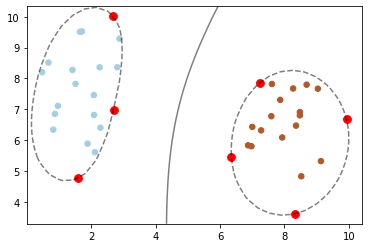

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()


In [ ]:
y

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

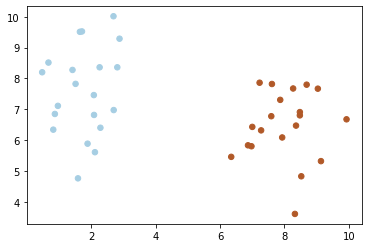

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)
plt.show()